###<u>**Problem Statement**</u>:
This project involves analyzing a dataset of transactions from a UK-based online retailer, covering the period from 2010 to 2011. The goal is to enhance marketing strategies and increase sales by segmenting customers based on their purchasing behavior.

The steps involved are:

**Transforming the Transaction Data:** Converting the transactional data into a customer-centric format by creating new features.

**Customer Segmentation:** Using the K-means clustering algorithm to group customers into distinct segments based on their profiles and preferences.

**Recommendation System:** Developing a recommendation system to suggest top-selling products to customers in each segment who haven’t purchased those items yet.

By understanding the unique characteristics of different customer groups, the marketing effectiveness can be improved, leading to increased sales.

Firstly, I will start with importing all the necessary liabraries that will be used throughout the exercise. This generally includes, liabraries for Data Preparation, Manipulation, Visualization, Preprocessing, Modelling and so on.

In [1]:
#Importing liabraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.graph_objects as go

###1. <u>**Data Understanding**</u>:

In [2]:
#Loading the data
customer_df = pd.read_csv("/content/data.csv", encoding='latin1')
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**About Dataset:**

InvoiceNo: Invoice number, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

In [3]:
customer_df.shape

(541909, 8)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#Summary statistics for numerical features
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


**Quantity:**
* The average quantity of items purchased per transaction is approximately 9.80.
* The median quantity is 3, indicating that half of the transactions involved the purchase of 3 or fewer items.
* There are extreme outliers in the quantity data, as evidenced by the minimum value of -74,215 and the maximum value of 74,215. Negative values are likely errors or returns and should be investigated.
* The large standard deviation (174.92) further highlights the high variability in the quantity purchased per transaction.

**Invoice Date:**
* Transactions span from December 1, 2010, to October 17, 2011.
* The mean and median dates are in May 2011, indicating that the dataset has a relatively even distribution of transactions over time.
* The interquartile range (from February 23 to August 14) shows that the middle 50% of transactions occurred within this period.

**Unit Price:**
* The average unit price of items is approximately £4.72.
* The median unit price is £2.10, indicating that half of the items are priced at £2.10 or less.
* Similar to quantity, there are significant outliers in unit price, with a minimum of -£11,062.06 and a maximum of £38,970. Negative values are likely errors and should be corrected.
* The large standard deviation (103.53) indicates high variability in item prices, suggesting a wide range of product prices in the dataset.

**Customer ID:**
* There are 297,998 unique customer IDs in the dataset.
* The average customer ID is 15,269, with a median of 15,140, indicating that the IDs are fairly evenly distributed.
* The range of customer IDs (from 12,346 to 18,287) and the interquartile range (13,870 to 16,779) show the distribution of customer IDs.
* The standard deviation (1,719.36) indicates that there is some spread in the customer IDs, but they are relatively concentrated around the mean.

**General Observations**
* There are significant outliers in both Quantity and UnitPrice that may require further investigation and potential data cleaning.
* The dataset spans a significant period (almost a year), providing a good temporal range for analysis.
* There are some missing customer IDs, as evidenced by the lower count for CustomerID compared to the other columns. These missing values should be addressed as part of data cleaning.
* Overall, these summary statistics provide insights into the data distribution and highlight areas that may require further cleaning and analysis.

















In [6]:
#Summary statistics for Categorical features
customer_df.describe(include = object).T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


**InvoiceNo:**
* There are 400,753 entries in the dataset, indicating the total number of transactions recorded.
* The dataset contains 20,111 unique invoice numbers, which suggests that many transactions are repeated.
* The most frequent invoice number is 558475, occurring 705 times. This could indicate a large bulk order or recurring transaction for a particular customer or group of customers.

**StockCode**
* There are 400,753 entries in the dataset for stock codes, representing the different products sold.
* The dataset includes 3,954 unique stock codes, indicating a wide variety of products.
* The most common stock code is 85123A, appearing 1,893 times. This product could be a best-seller or a frequently restocked item.

**Description**
* There are 399,422 entries with product descriptions, suggesting some transactions might have missing descriptions.
* The dataset has 4,057 unique product descriptions, showcasing a diverse range of products.
* The most frequent product description is "WHITE HANGING HEART T-LIGHT HOLDER," occurring 1,941 times. This item appears to be a very popular product.

**Country**
* There are 400,752 entries for the country of transaction, indicating nearly complete data in this column.
* The dataset contains transactions from 38 unique countries, showing a wide international reach.
* The most common country is the United Kingdom, with 364,633 transactions, indicating that the majority of the retailer's customers are from the UK.

**General Observations**
* InvoiceNo: The high frequency of certain invoice numbers suggests potential bulk orders or repeated transactions, which might be worth investigating further.
* StockCode and Description: The high frequency of specific stock codes and descriptions highlights the retailer's best-selling products.
* Country: The dominance of UK transactions suggests that marketing strategies could be heavily focused on the UK, but there is also an opportunity to explore and expand international sales.























###2. <u>**Data Cleaning, Preparation and Transformation**</u>:
This step involves a thorough cleaning and transformation process to refine the dataset. It includes addressing missing values, removing duplicate entries, correcting anomalies in product codes and descriptions, and making other necessary adjustments to prepare the data for detailed analysis and modeling.

Since in the dataframe information it is seen that 'InvoiceDate' column is of object datatype so, needs to convert it to datetime

In [7]:
customer_df['InvoiceDate'] = pd.to_datetime(customer_df['InvoiceDate'],errors='coerce')

In [8]:
customer_df['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 541909 entries, 0 to 541908
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
541909 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.1 MB


In [9]:
customer_df['InvoiceDate'].dt.year.unique()

array([2010, 2011], dtype=int32)

###Checking for missing data and Handling the missing values

Lets check the percentage of the missing values in each column

In [10]:
missing_data = customer_df.isna().sum()
missing_columns_percentage = (missing_data[missing_data > 0]/customer_df.shape[0]) * 100

In [11]:
missing_data

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [12]:
missing_columns_percentage

,0
Description,0.268311
CustomerID,24.926694


In [13]:
missing_columns_percentage.sort_values(ascending = True,inplace = True)

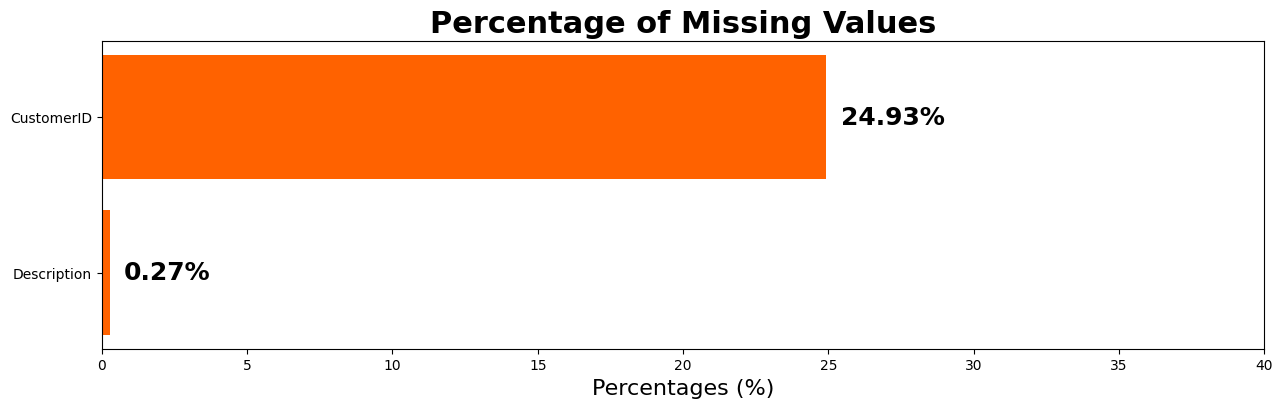

In [14]:
#Plotting barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_columns_percentage.index, missing_columns_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_columns_percentage, missing_columns_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()


####**Handling Missing Values Strategy**

**CustomerID (24.93% Missing Values)**:

The CustomerID column contains nearly a quarter of missing data, which is significant. Given the importance of this column for clustering customers and creating a recommendation system, it's critical to maintain data integrity. Imputing such a large percentage of missing values might introduce significant bias or noise into the analysis. Therefore, removing the rows with missing CustomerID values is the most reasonable approach to ensure accurate customer behavior and preferences analysis.

**Strategy:**

Action: Remove rows with missing CustomerID values.

Reason: To maintain the integrity of customer clusters and ensure accurate analysis.

**Description (0.27% missing values)**

The Description column has a minor percentage of missing values. However, it has been noticed that there are inconsistencies in the data where the same StockCode does not always have the same Description. This indicates data quality issues and potential errors in the product descriptions.

Given these inconsistencies, imputing the missing descriptions based on StockCode might not be reliable. Moreover, since the missing percentage is quite low, it would be prudent to remove the rows with missing Descriptions to avoid propagating errors and inconsistencies into the subsequent analyses.

By removing rows with missing values in the CustomerID and Description columns, we aim to construct a cleaner and more reliable dataset, which is essential for achieving accurate clustering and creating an effective recommendation system.


In [15]:
customer_df[customer_df['CustomerID'].isnull() | customer_df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [16]:
#Removing missing rows
customer_df.dropna(subset = ['CustomerID','Description'], inplace = True)

In [17]:
customer_df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [18]:
customer_df.shape

(406829, 8)

In [19]:
#Checking for duplicate entries if any
customer_df.duplicated().sum()

5225

**Handling Duplicates Strategy:**

In the context of this project, the presence of completely identical rows, including identical transaction times, suggests that these might be data recording errors rather than genuine repeated transactions. Keeping these duplicate rows can introduce noise and potential inaccuracies in the clustering and recommendation system.

Therefore, I am going to remove these completely identical duplicate rows from the dataset. Removing these rows will help in achieving a cleaner dataset, which in turn would aid in building more accurate customer clusters based on their unique purchasing behaviors. Moreover, it would help in creating a more precise recommendation system by correctly identifying the products with the most purchases.

In [20]:
#dropping duplicate entries from the dataset
customer_df.drop_duplicates(inplace = True)

In [21]:
customer_df.shape

(401604, 8)

####**Checking for  Cancelled Transaction**

To clarify our understanding of customer behaviour and preferences, take into account the transactions that were cancelled. Initially, let's filter out the rows where the InvoiceNo that starts with "C".

In [22]:
#FIltering out the rows with Invoice Number that starts with "C" and create a new column stating Transaction status
customer_df['TransactionStatus'] =  np.where(customer_df['InvoiceNo'].astype(str).str.startswith('C'),'Cancelled','Complete')

In [23]:
#Analyzing the Cancelled rows
Cancelled_Transactions = customer_df[customer_df['TransactionStatus'] == 'Cancelled']
Cancelled_Transactions.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,8872.000000,8872,8872.000000,8872.000000
mean,-30.774910,2011-06-27 09:06:05.024797184,18.899512,14990.152953
min,-80995.000000,2010-12-01 09:41:00,0.010000,12346.000000
25%,-6.000000,2011-03-23 11:23:45,1.450000,13505.000000
50%,-2.000000,2011-07-11 13:51:00,2.950000,14868.000000
75%,-1.000000,2011-10-06 20:36:00,4.950000,16393.000000
max,-1.000000,2011-12-09 11:58:00,38970.000000,18282.000000
std,1172.249902,NaN,445.190864,1708.230387


There are overall 8872 rows of Cancelled transactions.

All the quantities in the cancelled transactions are negative which indicates these are indeed Cancelled Transactions.

There is a wide spread in the UnitPrice column stating that the products that were Cancelled comes in various range i.e high to low.


####**Strategy for Handling Cancelled Transactions:**

To accurately cluster customers based on their purchasing behavior and preferences and to develop an effective recommendation system, it's crucial to account for cancellation patterns. Therefore, the approach is to retain cancelled transactions in the dataset, distinctly marking them for further analysis. This strategy will:

**Improve Clustering:** By incorporating cancellation patterns and trends, we can gain insights into specific customer behaviors or preferences, enhancing the overall clustering process.

**Enhance Recommendation System:** By analyzing cancellation data, we can avoid recommending products with a high likelihood of being cancelled, thereby increasing the quality and relevance of the recommendations.

In [24]:
# Finding the percentage of cancelled transactions
cancelled_percentage = (Cancelled_Transactions.shape[0] / customer_df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


####**Correcting StockCode Anomalies**

First of all, lets find the number of unique stock codes and to plot the top 10 most frequent stock codes along with their percentage frequency:

In [25]:
unique_stock_codes = customer_df['StockCode'].nunique()
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3684


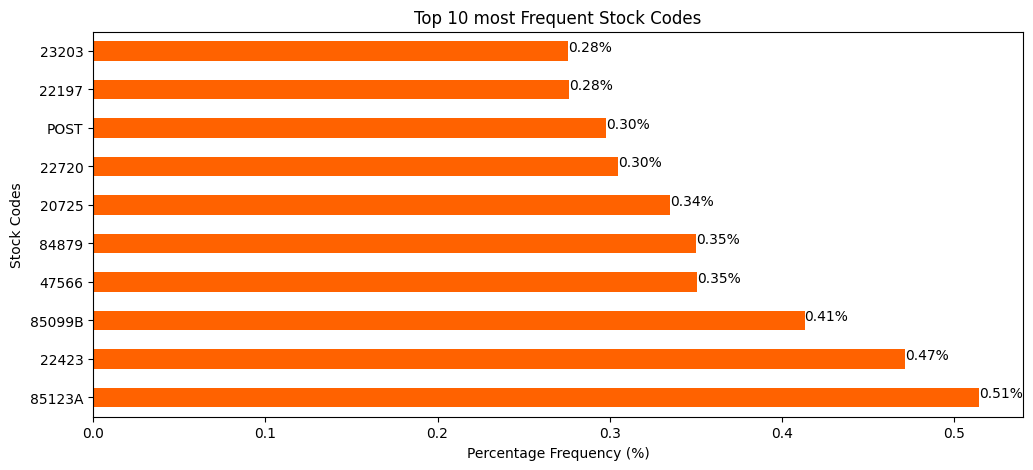

In [26]:
#Fetching top 10 most frequent Stockcodes
top_10_sc = customer_df['StockCode'].value_counts(normalize = True).head(10) * 100

#Plotting it
plt.figure(figsize=(12,5))
top_10_sc.plot(kind = 'barh', color = '#ff6200')
#Adding percentage frequency text on bars
for index, value in enumerate(top_10_sc):
  plt.text(value, index, f'{value:.2f}%', fontsize = 10)

plt.title('Top 10 most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.show()

**Product Variety:** The dataset contains 3684 unique stock codes, indicating a substantial variety of products available in the online retail store. This diversity can potentially lead to the identification of distinct customer clusters, with preferences for different types of products.

**Popular Items:** A closer look at the top 10 most frequent stock codes can offer insights into the popular products or categories that are frequently purchased by customers.

**Stock Code Anomalies:** We observe that while most stock codes are composed of 5 or 6 characters, there are some anomalies like the code 'POST'. These anomalies might represent services or non-product transactions (perhaps postage fees) rather than actual products. To maintain the focus of the project, which is clustering based on product purchases and creating a recommendation system, these anomalies should be further investigated and possibly treated appropriately to ensure data integrity.

To further investigate these anomalies, let's examine the frequency of numeric characters in the stock codes. This analysis can provide valuable insights into the nature of these unusual entries.

In [27]:
#Checking the number of numeric charaters in each of the stockcodes
unique_stock_code = customer_df['StockCode'].unique()

In [28]:
numeric_char_in_usc = pd.Series(unique_stock_code)
numeric_char_in_usc.head(2)

,0
0,85123A
1,71053


In [29]:
numeric_char_in_usc = numeric_char_in_usc.apply(lambda x : sum(c.isdigit() for c in str(x)))
numeric_char_in_usc.tail(2)

,0
3682,5
3683,5


In [30]:
numeric_char_in_usc = numeric_char_in_usc.value_counts()
# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
numeric_char_in_usc

Value counts of numeric character frequencies in unique stock codes:


,count
5,3676
0,7
1,1


The output indicates the following:

A majority of the unique stock codes (3676 out of 3684) contain exactly 5 numeric characters, which seems to be the standard format for representing product codes in this dataset.

There are a few anomalies: 7 stock codes contain no numeric characters and 1 stock code contains only 1 numeric character. These are clearly deviating from the standard format and need further investigation to understand their nature and whether they represent valid product transactions.

Now, let's identify the stock codes that contain 0 or 1 numeric characters to further understand these anomalies:

In [31]:
#Finding and printing the stockcodes with 0 and 1 numeric characters
stock_codes_with_anomaly = [code for code in unique_stock_code if sum(c.isdigit() for c in str(code)) in (0,1)]
print("Stock Codes with Anomalies:")
for code in stock_codes_with_anomaly:
  print(code)

Stock Codes with Anomalies:
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


Let's check the percentage of rows present in the dataset with these anomalies.

In [32]:
anomaly_percentage = (customer_df['StockCode'].isin(stock_codes_with_anomaly).sum() / len(customer_df)) * 100
# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {anomaly_percentage:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


Based on our analysis, we discovered that only a tiny fraction of records, specifically 0.48%, contain anomalous stock codes that deviate from the standard format seen in most of the data. These anomalous codes constitute just a small segment of all unique stock codes (8 out of 3,684).

These codes likely represent non-product transactions such as "BANK CHARGES" and "POST" (possibly postage fees). Since they do not correspond to actual products and make up a very small portion of the dataset, including them in the analysis could introduce noise and skew the results of the clustering and recommendation system.

**Action:**

Considering the project's goal of clustering customers based on their purchasing behaviors and creating a product recommendation system, it is wise to exclude records with anomalous stock codes from the dataset. By concentrating exclusively on genuine product transactions, the analysis will be more precise and insightful, leading to more accurate customer clusters and recommendations.

In [33]:
#Removing rows with anomalies
customer_df = customer_df[~customer_df['StockCode'].isin(stock_codes_with_anomaly)]
customer_df.shape

(399689, 9)

####**Cleaning Description Column**
Let's check the number of unique descriptions present in the dataset and then plot top 10 descriptions, giving the details of the highest appearing descriptions.

In [34]:
description_count = customer_df['Description'].value_counts()
description_count.head(2)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2058
REGENCY CAKESTAND 3 TIER,1894


In [35]:
top_10_description_count = description_count[:10]
top_10_description_count

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2058
REGENCY CAKESTAND 3 TIER,1894
JUMBO BAG RED RETROSPOT,1659
PARTY BUNTING,1409
ASSORTED COLOUR BIRD ORNAMENT,1405
LUNCH BAG RED RETROSPOT,1345
SET OF 3 CAKE TINS PANTRY DESIGN,1224
LUNCH BAG BLACK SKULL.,1099
PACK OF 72 RETROSPOT CAKE CASES,1062


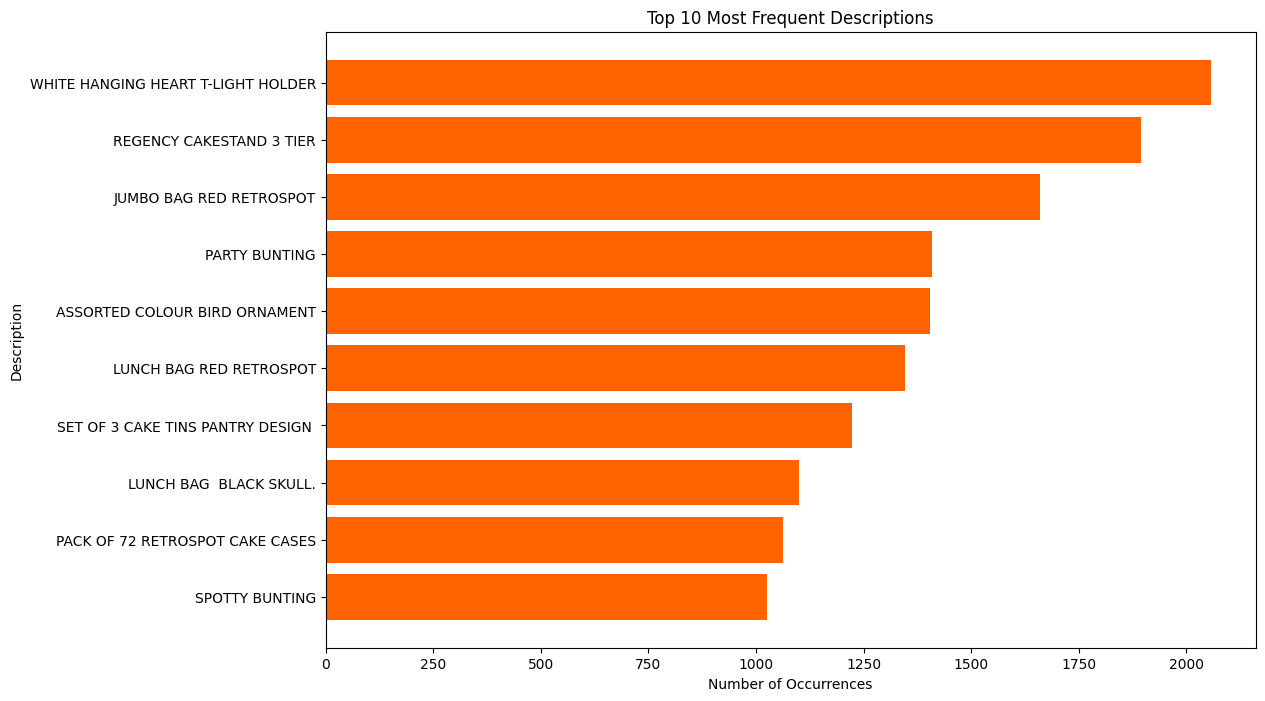

In [36]:
# Calculate the occurrence of each unique description and sort them
description_counts = customer_df['Description'].value_counts()


# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_10_description_count.index[::-1], top_10_description_count.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 10 Most Frequent Descriptions')

# Show the plot
plt.show()

The most frequent descriptions are generally household items, particularly those associated with kitchenware, lunch bags, and decorative items.

Interestingly, all the descriptions are in uppercase, which might be a standardized format for entering product descriptions in the database. However, considering the inconsistencies and anomalies encountered in the dataset so far, it would be prudent to check if there are descriptions entered in lowercase or a mix of case styles.

In [37]:
#Fetching unique description containing lowercase
lowercase_desc = customer_df['Description'].unique()
lowercase_desc = [ desc for desc in lowercase_desc if any(char.islower() for char in desc)]
for l in lowercase_desc:
  print(l)

BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


Upon examining the descriptions containing lowercase characters, it becomes apparent that some entries, like "Next Day Carriage" and "High Resolution Image," are not actual product descriptions. These entries appear to represent other types of information or service details unrelated to the actual products.

**Actions:**
1. Remove rows where the descriptions contain service-related information, such as "Next Day Carriage" and "High Resolution Image," as these do not represent actual products and would not contribute meaningfully to the clustering and recommendation system.

2. For the remaining descriptions with mixed case, standardize the text to uppercase to maintain uniformity across the dataset, reducing the chances of duplicate entries with different case styles.

Implementing this strategy will enhance the dataset's quality, making it more suitable for the analysis and modeling phases of the project.

In [38]:
service_related_desc =  ["Next Day Carriage", "High Resolution Image"]

#Calculating the percentage of Service related descriptions
service_related_desc_percentage = (customer_df[customer_df['Description'].isin(service_related_desc)].shape[0] / customer_df.shape[0]) * 100
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_desc_percentage:.2f}%")

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [39]:
#Remove rows with service related descriptions
customer_df = customer_df[~customer_df['Description'].isin(service_related_desc)]
customer_df.shape

(399606, 9)

####**Treating Zero Unit Prices**

Let's check the statistical summary of the Unit Price Column

In [40]:
customer_df['UnitPrice'].describe()

,UnitPrice
count,399606.000000
mean,2.904957
std,4.448796
min,0.000000
25%,1.250000
50%,1.950000
75%,3.750000
max,649.500000


Here, it is seen that the minimum value for Unit Price is zero, which indicates that there can be some free items or a potential data entry error.

To understand it, let's further deep dive into such records.

In [41]:
customer_df[customer_df['UnitPrice'] == 0].describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,33.000000,33,33.0,33.000000
mean,420.515152,2011-07-09 21:24:10.909091072,0.0,14252.575758
min,1.000000,2010-12-05 14:02:00,0.0,12415.000000
25%,2.000000,2011-03-30 12:45:00,0.0,13081.000000
50%,11.000000,2011-08-26 14:19:00,0.0,13985.000000
75%,36.000000,2011-11-04 11:55:00,0.0,14911.000000
max,12540.000000,2011-11-25 15:57:00,0.0,18059.000000
std,2176.713608,NaN,0.0,1659.811925


* There are only 33 transactions of zero unit price, which is relatively lower.
* However, quantity for these transactions vary and ranges from low to high.
* I believe, removing these transaction would be better in order to remove noise and avoid misreporting of the customer behaviour.






In [42]:
customer_df = customer_df[customer_df['UnitPrice'] > 0]
customer_df.shape

(399573, 9)

The algorithm used in K-means clustering is sensitive to the amount of data and the existence of outliers, as the latter may have a major impact on the centroids' positions and result in inaccurate cluster allocations. It would be wiser to handle the outlier problem after the feature engineering stage, when we produce a customer-centric dataset, given the context of this project, where the ultimate goal is to understand customer behavior and preferences through K-means clustering. Since the data is transactional at this point, eliminating outliers could also remove important information that is later used to segment customers. For the time being, we will thus go on to the next phase and put off the outlier treatment.

####**Feature Engineering**

These attributes can be engineered from the available data to produce a full customer-centric dataset for clustering and recommendation:

In [43]:
# Resetting the index of the cleaned dataset
customer_df.reset_index(drop=True, inplace=True)

**RFM Features**

RFM stands for Recency, Frequency, and Monetary value. These are features commonly used in customer segmentation and analysis, especially in marketing and sales.

1. Recency: How recently a customer made a purchase.

This measures the time since the last purchase. The more recent the purchase, the more likely the customer is to buy again.
A lower recency value means the customer has purchased more recently.
2. Frequency: How often a customer makes a purchase.

This measures the number of times a customer has made a purchase within a specific period. Higher frequency indicates a loyal customer.
3. Monetary value: How much money a customer spends on purchases.

This measures the total amount of money spent by the customer over a specific period. Higher monetary value indicates a more valuable customer.

**<u>1. Recency</u>**

This stage is all about figuring out how recent a customer's transaction was. This is an essential component of customer segmentation since it facilitates the determination of the degree of consumer interaction. I will now define the aforementioned feature:

**Days Since Last Purchases:** The feature indicates how many days have gone by since the customer's most recent purchase. While a larger value can suggest a lapse or decreased involvement, a lower value suggests that the client has just made a purchase, signaling a higher level of engagement with the firm. Businesses might potentially increase customer retention and encourage loyalty by customizing their marketing efforts to re-engage customers who have not made purchases in a while by understanding the recency of those sales.

In [44]:
customer_df['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 399573 entries, 0 to 399572
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
399573 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 MB


In [45]:
#Creating a new column which will have only date and not the time of purchase
customer_df['InvoiceDay'] = customer_df['InvoiceDate'].dt.date

#Find the most recent purchase of each of the customer
customer_data_df = customer_df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

#Most recent date of the purchase irrespective of teh customer
most_recent_date = customer_data_df['InvoiceDay'].max()

#Convert most_recent_date and newly created column to datetime
customer_data_df['InvoiceDay'] = pd.to_datetime(customer_data_df['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

#Calculate number of days since the last purchase of the customers
customer_data_df['Days_from_last_purchase'] = (most_recent_date - customer_data_df['InvoiceDay']).dt.days

In [46]:
customer_data_df.head()

,CustomerID,InvoiceDay,Days_from_last_purchase
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


I have created a new dataframe named "customer_data_df" which will contain all the customer related information.

**<u>2. Frequency</u>**

This step will involve the creation of two features that measure how frequently a client interacts with the retailer:

**Total Transactions:** A customer's total number of transactions is represented by this characteristic. It facilitates the comprehension of a customer's degree of interaction with the retailer.

**Total Products Purchased:** The total number of products (sum of quantities) that a customer has purchased throughout all transactions is displayed via this feature. It provides information about the number of things that customers have bought, providing insight into their buying behavior.
These qualities will be essential for dividing up the customer base into buying frequency-based segments, which is a critical step in creating customer profiles for tailored suggestions and marketing campaigns.

In [47]:
#Compute total number of transactions made by each customer
total_num_transactions = customer_df.groupby('CustomerID')['InvoiceNo'].nunique()

# Convert the Series to a DataFrame
total_num_transactions = total_num_transactions.to_frame()

#Rename InvoiceNo column to TotalTransactions
total_num_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)
total_num_transactions = total_num_transactions.reset_index()

In [48]:
#Compute total number of products purchased by each customer
total_num_products = customer_df.groupby('CustomerID')['Quantity'].nunique()

# Convert the Series to a DataFrame
total_num_products = total_num_products.to_frame()

#Rename Quantity column to TotalProducts
total_num_products.rename(columns={'Quantity': 'Total_Products'}, inplace=True)
total_num_products = total_num_products.reset_index()

In [49]:
#Merge the above created features to Customer_data_df
customer_data_df = pd.merge(customer_data_df, total_num_transactions, on = 'CustomerID')
customer_data_df = pd.merge(customer_data_df, total_num_products, on = 'CustomerID')
customer_data_df.head()

,CustomerID,InvoiceDay,Days_from_last_purchase,Total_Transactions,Total_Products
0,12346.0,2011-01-18,325,2,2
1,12347.0,2011-12-07,2,7,15
2,12348.0,2011-09-25,75,4,8
3,12349.0,2011-11-21,18,1,12
4,12350.0,2011-02-02,310,1,4


**<u>3. Monetary</u>**

I'm going to construct two features in this stage that stand in for the financial component of the customers' transactions:

**Total Spend:** This feature shows how much money each consumer has spent overall. It is determined by multiplying the unit price by the quantity of each transaction a consumer has made. This function is essential since it makes it easier to determine the overall amount of money each customer brings in, which is a clear indication of how valuable a customer is to the company.

**Average Transaction:** The calculation of the Value involves dividing the Total Spend by the Total Transactions for every customer. It shows the typical amount spent by a consumer on a transaction. This measure helps to identify how clients spend money on each transaction.

In [50]:
#Calculate total spend by each customer
customer_df['TotalSpend'] = customer_df['UnitPrice'] * customer_df['Quantity']
Total_Spend = customer_df.groupby('CustomerID')['TotalSpend'].sum().reset_index()

Total_Spend.head(2)

,CustomerID,TotalSpend
0,12346.0,0.0
1,12347.0,4310.0


In [51]:
#Calculate average transaction value for each customer
Avg_transaction  = Total_Spend.merge(total_num_transactions, on = 'CustomerID')
Avg_transaction.head(2)

,CustomerID,TotalSpend,Total_Transactions
0,12346.0,0.0,2
1,12347.0,4310.0,7


In [52]:
Avg_transaction['AvgTransaction'] = Avg_transaction['TotalSpend'] / Avg_transaction['Total_Transactions']
Avg_transaction.head()

,CustomerID,TotalSpend,Total_Transactions,AvgTransaction
0,12346.0,0.00,2,0.000000
1,12347.0,4310.00,7,615.714286
2,12348.0,1437.24,4,359.310000
3,12349.0,1457.55,1,1457.550000
4,12350.0,294.40,1,294.400000


In [53]:
#Merge the above created features to Customer_data_df
customer_data_df = pd.merge(customer_data_df, Total_Spend[['CustomerID','TotalSpend']], on = 'CustomerID')
customer_data_df = pd.merge(customer_data_df, Avg_transaction[['CustomerID','AvgTransaction']], on = 'CustomerID')
customer_data_df.head()

,CustomerID,InvoiceDay,Days_from_last_purchase,Total_Transactions,Total_Products,TotalSpend,AvgTransaction
0,12346.0,2011-01-18,325,2,2,0.00,0.000000
1,12347.0,2011-12-07,2,7,15,4310.00,615.714286
2,12348.0,2011-09-25,75,4,8,1437.24,359.310000
3,12349.0,2011-11-21,18,1,12,1457.55,1457.550000
4,12350.0,2011-02-02,310,1,4,294.40,294.400000


####**Products Diversity**

In this step, we are going to understand the diversity in the product purchase behavior of customers. Understanding product diversity can help in crafting personalized marketing strategies and product recommendations. Here, I am going to define the following feature:

**Unique Products Purchased**: This feature represents the number of distinct products bought by a customer. A higher value indicates that the customer has a diverse taste or preference, buying a wide range of products, while a lower value might indicate a focused or specific preference. Understanding the diversity in product purchases can help in segmenting customers based on their buying diversity, which can be a critical input in personalizing product recommendations.

In [54]:
#Calculate the number of unique products purchased by each customer
unique_products = customer_df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products.rename(columns = {'StockCode' : 'UniqueProducts'}, inplace = True)

#Merge newly created feature with the customer data
customer_data_df = pd.merge(customer_data_df,unique_products, on = 'CustomerID')
customer_data_df.head(2)

,CustomerID,InvoiceDay,Days_from_last_purchase,Total_Transactions,Total_Products,TotalSpend,AvgTransaction,UniqueProducts
0,12346.0,2011-01-18,325,2,2,0.0,0.000000,1
1,12347.0,2011-12-07,2,7,15,4310.0,615.714286,103


####**Behavioral Features**

In this step, we aim to understand and capture our customers' shopping habits. These insights will help us personalize their shopping experiences.

**Average Days Between Purchases:** This shows how many days a customer typically waits before making another purchase. Knowing this helps predict when they might buy again, which is useful for targeted marketing and personalized promotions.

**Favorite Shopping Day:** This indicates which day of the week a customer shops the most. This can help us identify the best days to run marketing campaigns and promotions for different customer groups.

**Favorite Shopping Hour:** This reveals the time of day a customer prefers to shop. Understanding this helps us time our marketing efforts to match when customers are most likely to be active.

By adding these behavioral features to our dataset, we can gain a deeper understanding of our customers, which will improve the accuracy and relevance of our customer segments.


In [55]:
'''
Breaking Down the Lambda Function:
x.diff()
x.diff() computes the difference between each date and the previous date in the 'InvoiceDay' column for each customer.
Example: If the 'InvoiceDay' column for a customer is [2024-01-01, 2024-01-15, 2024-02-01], the .diff() function will produce [NaT, 14 days, 17 days].
.dropna()
.dropna() removes the first entry (NaT) because the difference is undefined for the first date.
Example continued: [14 days, 17 days].
.apply(lambda y: y.days)
.apply(lambda y: y.days) converts the difference from a Timedelta object to an integer number of days.
Example continued: [14, 17].
'''

"\nBreaking Down the Lambda Function:\nx.diff()\nx.diff() computes the difference between each date and the previous date in the 'InvoiceDay' column for each customer.\nExample: If the 'InvoiceDay' column for a customer is [2024-01-01, 2024-01-15, 2024-02-01], the .diff() function will produce [NaT, 14 days, 17 days].\n.dropna()\n.dropna() removes the first entry (NaT) because the difference is undefined for the first date.\nExample continued: [14 days, 17 days].\n.apply(lambda y: y.days)\n.apply(lambda y: y.days) converts the difference from a Timedelta object to an integer number of days.\nExample continued: [14, 17].\n"

In [56]:
#Extract day of the week and hour from the InvoiceDate
customer_df['Day_of_week'] = customer_df['InvoiceDate'].dt.dayofweek
customer_df['Hour'] = customer_df['InvoiceDate'].dt.hour

#Calculate the average number of days between consecutive purchase
days_between_purchases = customer_df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns = {'InvoiceDay' : 'Average_Days_Between_Purchases'}, inplace = True)
average_days_between_purchases.head(2)

<ipython-input-56-f9db92547769>:6: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  days_between_purchases = customer_df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))


,CustomerID,Average_Days_Between_Purchases
0,12346.0,0.000000
1,12347.0,2.016575


In [57]:
#Calculate favourite shopping day of the week
favorite_shopping_day = customer_df.groupby(['CustomerID', 'Day_of_week'])
favorite_shopping_day = favorite_shopping_day.size()
favorite_shopping_day = favorite_shopping_day.reset_index(name='Count')
favorite_shopping_day.head(2)

,CustomerID,Day_of_week,Count
0,12346.0,1,2
1,12347.0,0,47


In [58]:
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_of_week']]
favorite_shopping_day.head(3)

,CustomerID,Day_of_week
0,12346.0,1
2,12347.0,1
6,12348.0,3


In [59]:
#Calculate favourite shopping hour of the day
favorite_shopping_hour = customer_df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

In [60]:
# Merge the new features into the customer_data dataframe
customer_data_df = pd.merge(customer_data_df, average_days_between_purchases, on='CustomerID')
customer_data_df = pd.merge(customer_data_df, favorite_shopping_day, on='CustomerID')
customer_data_df = pd.merge(customer_data_df, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data_df.head()

,CustomerID,InvoiceDay,Days_from_last_purchase,Total_Transactions,Total_Products,TotalSpend,AvgTransaction,UniqueProducts,Average_Days_Between_Purchases,Day_of_week,Hour
0,12346.0,2011-01-18,325,2,2,0.00,0.000000,1,0.000000,1,10
1,12347.0,2011-12-07,2,7,15,4310.00,615.714286,103,2.016575,1,14
2,12348.0,2011-09-25,75,4,8,1437.24,359.310000,21,10.884615,3,19
3,12349.0,2011-11-21,18,1,12,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,2011-02-02,310,1,4,294.40,294.400000,16,0.000000,2,16


####**Geographic Features**

Now, let's add a geographic feature that represents the consumers' whereabouts in this step. Comprehending the geographical dispersion of customer is essential for multiple reasons:

**Country:** Each customer's location is determined by this feature. We can better understand regionally unique purchasing habits and preferences by including the country data. It is possible for preferences and purchase behaviors to differ throughout regions, which can be important when tailoring marketing campaigns and inventory management.

In [61]:
customer_df['Country'].value_counts(normalize = True).head()

,proportion
Country,
United Kingdom,0.890971
Germany,0.022722
France,0.020402
EIRE,0.018440
Spain,0.006162


Given that a substantial portion (**89%**) of transactions are originating from the United Kingdom, we might consider creating a binary feature indicating whether the transaction is from the UK or not. This approach can potentially streamline the clustering process without losing critical geographical information, especially when considering the application of algorithms like K-means which are sensitive to the dimensionality of the feature space.

* First, I will group the data by CustomerID and Country and calculate the number of transactions per country for each customer.
* Next, I will identify the main country for each customer (the country from which they have the maximum transactions).
* Then, I will create a binary column indicating whether the customer is from the UK or not.
* Finally, I will merge this information with the customer_data dataframe to include the new feature in our analysis.

In [62]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = customer_df.groupby('CustomerID')['Country'].size().reset_index(name = 'Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending = False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_df['Country'].apply(lambda x : 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data_df = pd.merge(customer_data_df, customer_main_country[['CustomerID', 'Is_UK']], on = 'CustomerID', how = 'left')

customer_data_df.head()

,CustomerID,InvoiceDay,Days_from_last_purchase,Total_Transactions,Total_Products,TotalSpend,AvgTransaction,UniqueProducts,Average_Days_Between_Purchases,Day_of_week,Hour,Is_UK
0,12346.0,2011-01-18,325,2,2,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2011-12-07,2,7,15,4310.00,615.714286,103,2.016575,1,14,1
2,12348.0,2011-09-25,75,4,8,1437.24,359.310000,21,10.884615,3,19,1
3,12349.0,2011-11-21,18,1,12,1457.55,1457.550000,72,0.000000,0,9,1
4,12350.0,2011-02-02,310,1,4,294.40,294.400000,16,0.000000,2,16,1


In [63]:
customer_data_df['Is_UK'].value_counts().reset_index()

,Is_UK,count
0,1,4086
1,0,196


####**Cancellation Insights:**

In this step, I am going to delve deeper into the cancellation patterns of customers to gain insights that can enhance our customer segmentation model. The features I am planning to introduce are:

**Cancellation Frequency:** This metric represents the total number of transactions a customer has canceled. Understanding the frequency of cancellations can help us identify customers who are more likely to cancel transactions. This could be an indicator of dissatisfaction or other issues, and understanding this can help us tailor strategies to reduce cancellations and enhance customer satisfaction.

**Cancellation Rate:** This represents the proportion of transactions that a customer has canceled out of all their transactions. This metric gives a normalized view of cancellation behavior. A high cancellation rate might be indicative of an unsatisfied customer segment. By identifying these segments, we can develop targeted strategies to improve their shopping experience and potentially reduce the cancellation rate.
By incorporating these cancellation insights into our dataset, we can build a more comprehensive view of customer behavior, which could potentially aid in creating more effective and nuanced customer segmentation.

In [64]:
#Calculate total number of transactions made by each customer
total_transactions = customer_df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

#Calculate total number of cancelled transactions for each customer
cancelled_transactions = customer_df[customer_df['TransactionStatus'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns = {'InvoiceNo': 'CancellationFrequency'},inplace = True)

#Merge Cancellation frequency into Customer data dataframe
customer_data_df = pd.merge(customer_data_df, cancellation_frequency, on = 'CustomerID')

#Replace Nan values with 0 for the customers who do have not cancelled any transaction
customer_data_df['CancellationFrequency'] = customer_data_df['CancellationFrequency'].fillna(0)

customer_data_df['CancellationRate'] = customer_data_df['CancellationFrequency'] / total_transactions['InvoiceNo']
customer_data_df.head()

,CustomerID,InvoiceDay,Days_from_last_purchase,Total_Transactions,Total_Products,TotalSpend,AvgTransaction,UniqueProducts,Average_Days_Between_Purchases,Day_of_week,Hour,Is_UK,CancellationFrequency,CancellationRate
0,12346.0,2011-01-18,325,2,2,0.00,0.000000,1,0.000000,1,10,1,1,0.500000
1,12352.0,2011-11-03,36,8,12,1265.41,158.176250,57,3.132530,1,14,1,1,0.142857
2,12359.0,2011-12-02,7,6,15,6182.98,1030.496667,214,1.296000,3,12,1,2,0.500000
3,12362.0,2011-12-06,3,13,18,4665.58,358.890769,200,1.110266,3,15,1,3,3.000000
4,12375.0,2011-12-07,2,3,6,375.42,125.140000,13,6.400000,4,14,1,1,1.000000


####**Seasonality and Trends:**

In this step, I will delve into the seasonality and trends in customers' purchasing behaviors, which can offer invaluable insights for tailoring marketing strategies and enhancing customer satisfaction. Here are the features I am looking to introduce:

**Monthly_Spending_Mean:** This is the average amount a customer spends monthly. It helps us gauge the general spending habit of each customer. A higher mean indicates a customer who spends more, potentially showing interest in premium products, whereas a lower mean might indicate a more budget-conscious customer.

**Monthly_Spending_Std:** This feature indicates the variability in a customer's monthly spending. A higher value signals that the customer's spending fluctuates significantly month-to-month, perhaps indicating sporadic large purchases. In contrast, a lower value suggests more stable, consistent spending habits. Understanding this variability can help in crafting personalized promotions or discounts during periods they are expected to spend more.

**Spending_Trend:** This reflects the trend in a customer's spending over time, calculated as the slope of the linear trend line fitted to their spending data. A positive value indicates an increasing trend in spending, possibly pointing to growing loyalty or satisfaction. Conversely, a negative trend might signal decreasing interest or satisfaction, highlighting a need for re-engagement strategies. A near-zero value signifies stable spending habits. Recognizing these trends can help in developing strategies to either maintain or alter customer spending patterns, enhancing the effectiveness of marketing campaigns.

By incorporating these detailed insights into our customer segmentation model, we can create more precise and actionable customer groups, facilitating the development of highly targeted marketing strategies and promotions.

In [65]:
#Extract Month and year from the Invoice Date
customer_df['Year'] = customer_df['InvoiceDate'].dt.year
customer_df['Month'] = customer_df['InvoiceDate'].dt.month

#Calculate monthly spending for each customer
monthly_spending = customer_df.groupby(['CustomerID','Year','Month'])['TotalSpend'].sum().reset_index()

#Calculate Seasonal buying Patterns using monthly frequency as a proxy for seasonal buying pattern
seasonal_buying_pattern = monthly_spending.groupby('CustomerID')['TotalSpend'].agg(['mean','std']).reset_index()

seasonal_buying_pattern.rename(columns={'mean':'Monthly_Spending_mean','std':'Monthly_Spending_std'},inplace = True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
#---NaN values in Monthly_Spending_Std occur due to the lack of variability with a single transaction.
#---The mean can always be calculated as long as there is at least one transaction.
seasonal_buying_pattern['Monthly_Spending_std'] = seasonal_buying_pattern['Monthly_Spending_std'].fillna(0)

# Calculate Trends in Spending
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
  #If there are more than one data points, we calculate teh trend using linear regression
  if len(spend_data) > 0:
    #np.arange is a function in the NumPy library that returns evenly spaced values within a given interval.
    x = np.arange(len(spend_data))
    #The four underscores _ in the line slope, _, _, _, _ = linregress(x, spend_data) are placeholders for the other values returned by the linregress function that we don't need to use.
    #slope, intercept, p_value, r_value, std_err
    slope, _, _, _, _ = linregress(x,spend_data)
    return slope
  #If we have only one data point no trend can be calculated hence return 0
  else:
    return 0

#apply calculate_trend function to find the spending trend of each customer
spending_trends = monthly_spending.groupby('CustomerID')['TotalSpend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns = {'TotalSpend':'SpendingTrend'},inplace = True)

#Merge the new data into customer data dataframe
customer_data_df = pd.merge(customer_data_df, seasonal_buying_pattern, on = 'CustomerID')
customer_data_df = pd.merge(customer_data_df, spending_trends[['CustomerID','SpendingTrend']], on = 'CustomerID')

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [66]:
customer_data_df.head()

,CustomerID,InvoiceDay,Days_from_last_purchase,Total_Transactions,Total_Products,TotalSpend,AvgTransaction,UniqueProducts,Average_Days_Between_Purchases,Day_of_week,Hour,Is_UK,CancellationFrequency,CancellationRate,Monthly_Spending_mean,Monthly_Spending_std,SpendingTrend
0,12346.0,2011-01-18,325,2,2,0.00,0.000000,1,0.000000,1,10,1,1,0.500000,0.000000,0.000000,NaN
1,12352.0,2011-11-03,36,8,12,1265.41,158.176250,57,3.132530,1,14,1,1,0.142857,316.352500,134.700629,9.351000
2,12359.0,2011-12-02,7,6,15,6182.98,1030.496667,214,1.296000,3,12,1,2,0.500000,1030.496667,1137.566659,25.072571
3,12362.0,2011-12-06,3,13,18,4665.58,358.890769,200,1.110266,3,15,1,3,3.000000,583.197500,393.992285,46.824048
4,12375.0,2011-12-07,2,3,6,375.42,125.140000,13,6.400000,4,14,1,1,1.000000,125.140000,110.186654,-96.190000


We have created a dataset that focuses on our customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.

In [67]:
customer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CustomerID                      1523 non-null   float64       
 1   InvoiceDay                      1523 non-null   datetime64[ns]
 2   Days_from_last_purchase         1523 non-null   int64         
 3   Total_Transactions              1523 non-null   int64         
 4   Total_Products                  1523 non-null   int64         
 5   TotalSpend                      1523 non-null   float64       
 6   AvgTransaction                  1523 non-null   float64       
 7   UniqueProducts                  1523 non-null   int64         
 8   Average_Days_Between_Purchases  1523 non-null   float64       
 9   Day_of_week                     1523 non-null   int32         
 10  Hour                            1523 non-null   int32         
 11  Is_U

In [68]:
customer_data_df['SpendingTrend'] = customer_data_df['SpendingTrend'].fillna(0)

In [69]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data_df['CustomerID'] = customer_data_df['CustomerID'].astype(str)

# Convert data types of columns to optimal types
customer_data_df = customer_data_df.convert_dtypes()

In [70]:
customer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CustomerID                      1523 non-null   string        
 1   InvoiceDay                      1523 non-null   datetime64[ns]
 2   Days_from_last_purchase         1523 non-null   Int64         
 3   Total_Transactions              1523 non-null   Int64         
 4   Total_Products                  1523 non-null   Int64         
 5   TotalSpend                      1523 non-null   Float64       
 6   AvgTransaction                  1523 non-null   Float64       
 7   UniqueProducts                  1523 non-null   Int64         
 8   Average_Days_Between_Purchases  1523 non-null   Float64       
 9   Day_of_week                     1523 non-null   Int32         
 10  Hour                            1523 non-null   Int32         
 11  Is_U

####Customer Dataset Description:
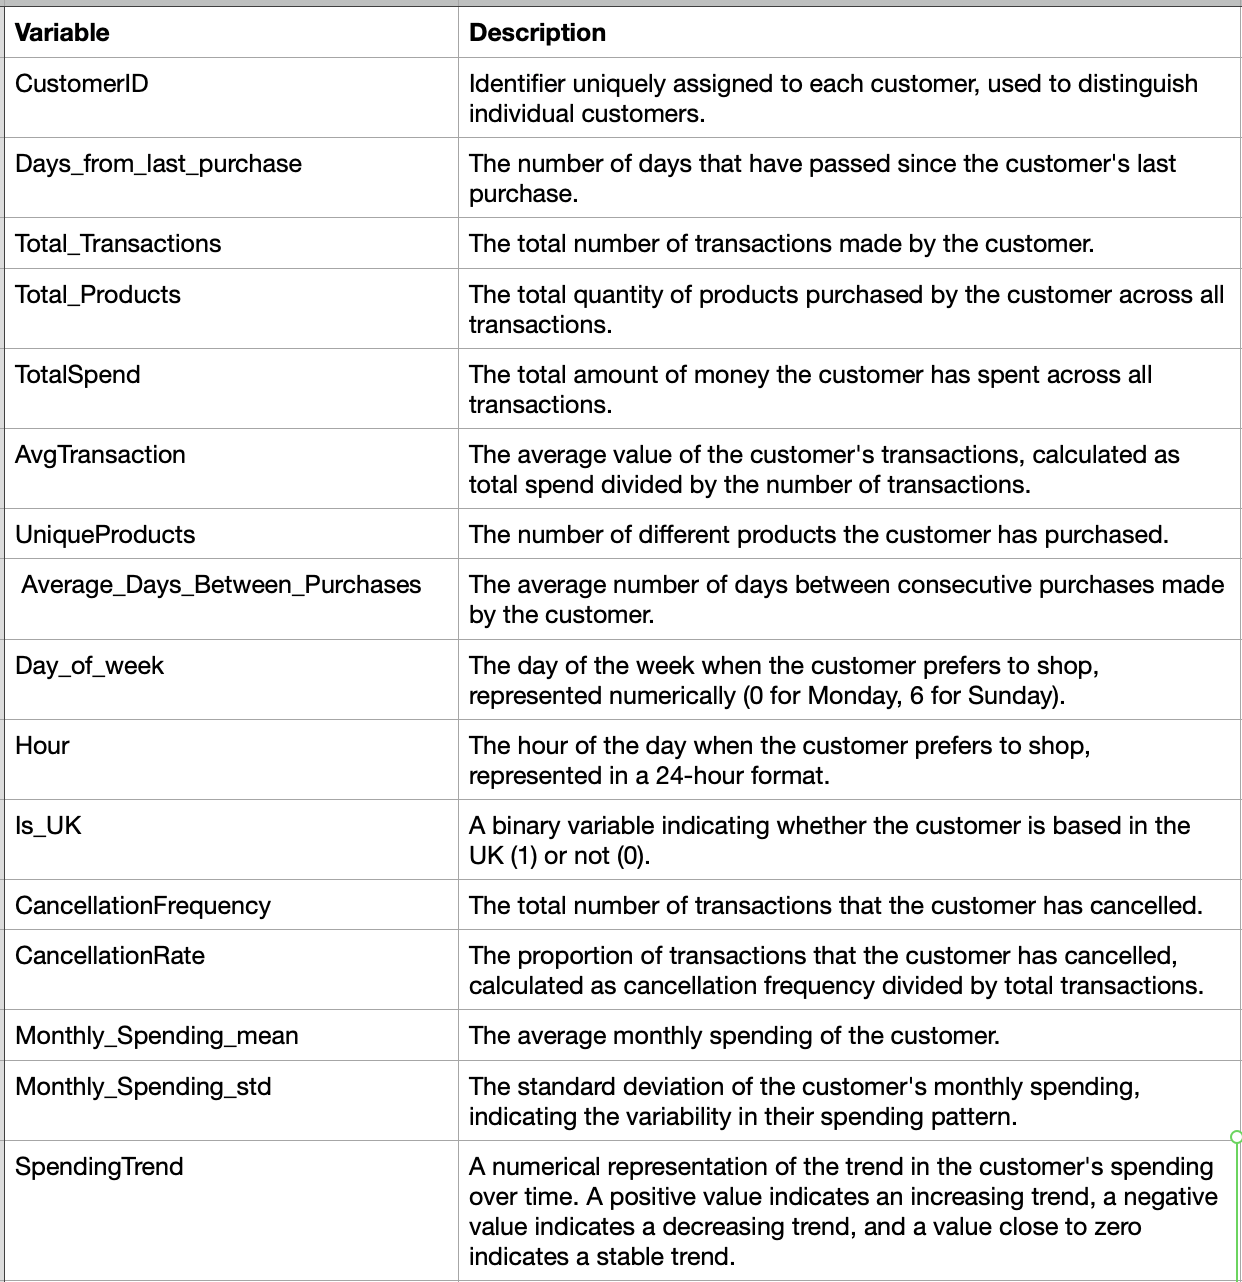

In [71]:
#Dropping InvoiceDay column from the Customer_data_df dataframe
customer_data_df = customer_data_df.drop(columns = 'InvoiceDay')

We have created a dataset that focuses on our customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.

Now that our dataset is ready, we can move on to the next steps of our project. This includes looking at our data more closely to find any patterns or trends, making sure our data is in the best shape by checking for and handling any outliers, and preparing our data for the clustering process. All of these steps will help us build a strong foundation for creating our customer segments and, eventually, a personalized recommendation system.

####Outlier Detection and Treatment:


I will locate and deal with outliers in our dataset in this part. Data points classified as outliers deviate substantially from the bulk of the dataset's other points. Our analysis's findings may be skewed by these points, particularly in k-means clustering, where they have a major impact on the cluster centroids' positions. So, in order to get more accurate and significant clustering findings, it is crucial to recognize and handle these outliers properly.

The usage of algorithms that can identify outliers in multi-dimensional spaces would be wise due to the multi-dimensional nature of the data. I'm going to approach this task using the Isolation Forest technique. This is a computationally efficient algorithm that performs well with multi-dimensional data.

In [72]:
#Initializing IsolationForest Model
outlier_model = IsolationForest(contamination = 0.05, random_state=0)

#Fitting the model on our dataset (converting columns to the numpy to avoid warning)
customer_data_df['Outlier_score'] = outlier_model.fit_predict(customer_data_df.iloc[:,1:].to_numpy())

In [73]:
customer_data_df['Outlier_score'].value_counts()

,count
Outlier_score,
1,1446
-1,77


In [74]:
#Create a new column to identify outliers (0 for inliers and 1 for outliers)
customer_data_df['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data_df['Outlier_score']]
customer_data_df.head()

,CustomerID,Days_from_last_purchase,Total_Transactions,Total_Products,TotalSpend,AvgTransaction,UniqueProducts,Average_Days_Between_Purchases,Day_of_week,Hour,Is_UK,CancellationFrequency,CancellationRate,Monthly_Spending_mean,Monthly_Spending_std,SpendingTrend,Outlier_score,Is_Outlier
0,12346.0,325,2,2,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1,0
1,12352.0,36,8,12,1265.41,158.17625,57,3.13253,1,14,1,1,0.142857,316.3525,134.700629,9.351,1,0
2,12359.0,7,6,15,6182.98,1030.496667,214,1.296,3,12,1,2,0.5,1030.496667,1137.566659,25.072571,1,0
3,12362.0,3,13,18,4665.58,358.890769,200,1.110266,3,15,1,3,3.0,583.1975,393.992285,46.824048,1,0
4,12375.0,2,3,6,375.42,125.14,13,6.4,4,14,1,1,1.0,125.14,110.186654,-96.19,1,0


We have located the outliers and labeled them in a new column called Is_Outlier after using the Isolation Forest technique. Additionally, we computed the outlier scores, which indicate each record's abnormality score.

Let's now see how these scores are distributed and how many inliers and outliers the model identified:

In [75]:
#Calculate the percentatge of inliers and outliers
outlier_percentage = customer_data_df['Is_Outlier'].value_counts(normalize = True) * 100
outlier_percentage

,proportion
Is_Outlier,
0,94.944189
1,5.055811


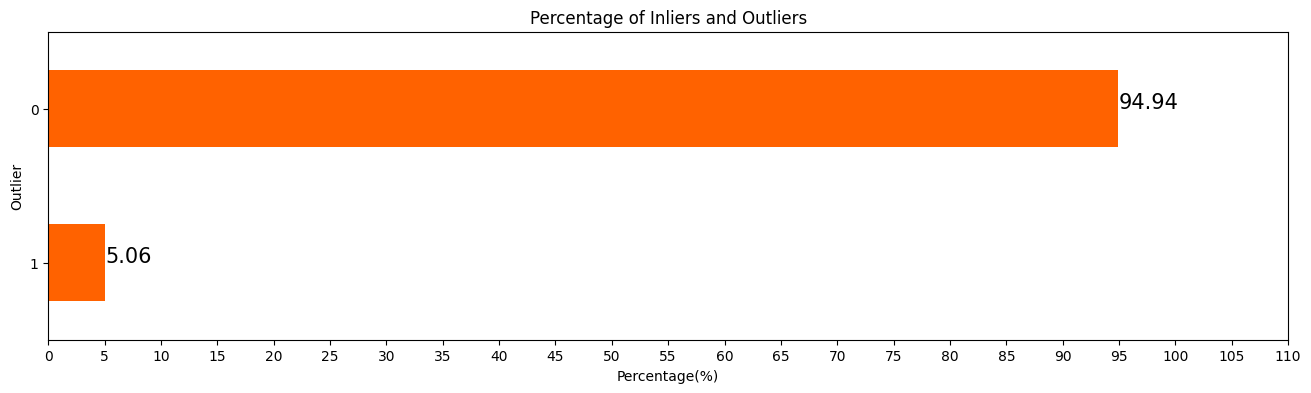

In [76]:
#Plotting the percentage of Inliers and Outliers
plt.figure(figsize = (16,4))
outlier_percentage.plot(kind = 'barh', color = '#ff6200')

#Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
  plt.text(value,index,f'{value:.2f}', fontsize = 15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0,115,5))
plt.xlabel('Percentage(%)')
plt.ylabel('Outlier')
plt.gca().invert_yaxis()
plt.show()

Handling these outliers is essential given the project's nature (customer segmentation via clustering) in order to keep them from having a major impact on the quality of the clusters. Therefore, in order to prepare our primary dataset for the clustering study, I will eliminate these outliers and segregate them for additional analysis.

Let's take the subsequent actions:

Save the discovered outliers into a separate file (optional) and segregate them for additional investigation.
To stop the outliers from affecting the clustering process, remove them from the main dataset.
Since Outlier_Scores and Is_Outlier were auxiliary columns utilized in the outlier detection procedure, remove them.
Let's put these actions into action:

In [77]:
#Separate Outliers for analysis
Outlier_data = customer_data_df[customer_data_df['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned_df = customer_data_df[customer_data_df['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned_df = customer_data_cleaned_df.drop(columns=['Outlier_score', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned_df.reset_index(drop=True, inplace=True)

By eliminating these outliers, we were able to tidy up our primary dataset and successfully segregate the outliers for additional research. The subsequent phases of our customer segmentation project, which involve scaling the characteristics and using clustering techniques to find discrete customer segments, are now possible with this cleaned dataset.

In [78]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned_df.shape[0]

1446

####**Correlation Analysis**

It's crucial to examine the association between the features in our dataset before moving on to KMeans clustering. Since features do not offer unique information, multicollinearity—where features are highly correlated—may have an impact on the clustering process by preventing the model from learning the true underlying patterns in the data. Clusters that are not meaningfully separated could result from this.

We can use dimensionality reduction methods like PCA if multicollinearity is detected. By converting the correlated features into a new collection of uncorrelated variables, these methods aid in mitigating the impact of multicollinearity while maintaining the majority of the variation in the original data. In addition to improving the quality of the clusters that are created, this step increases the computational efficiency of the clustering process.

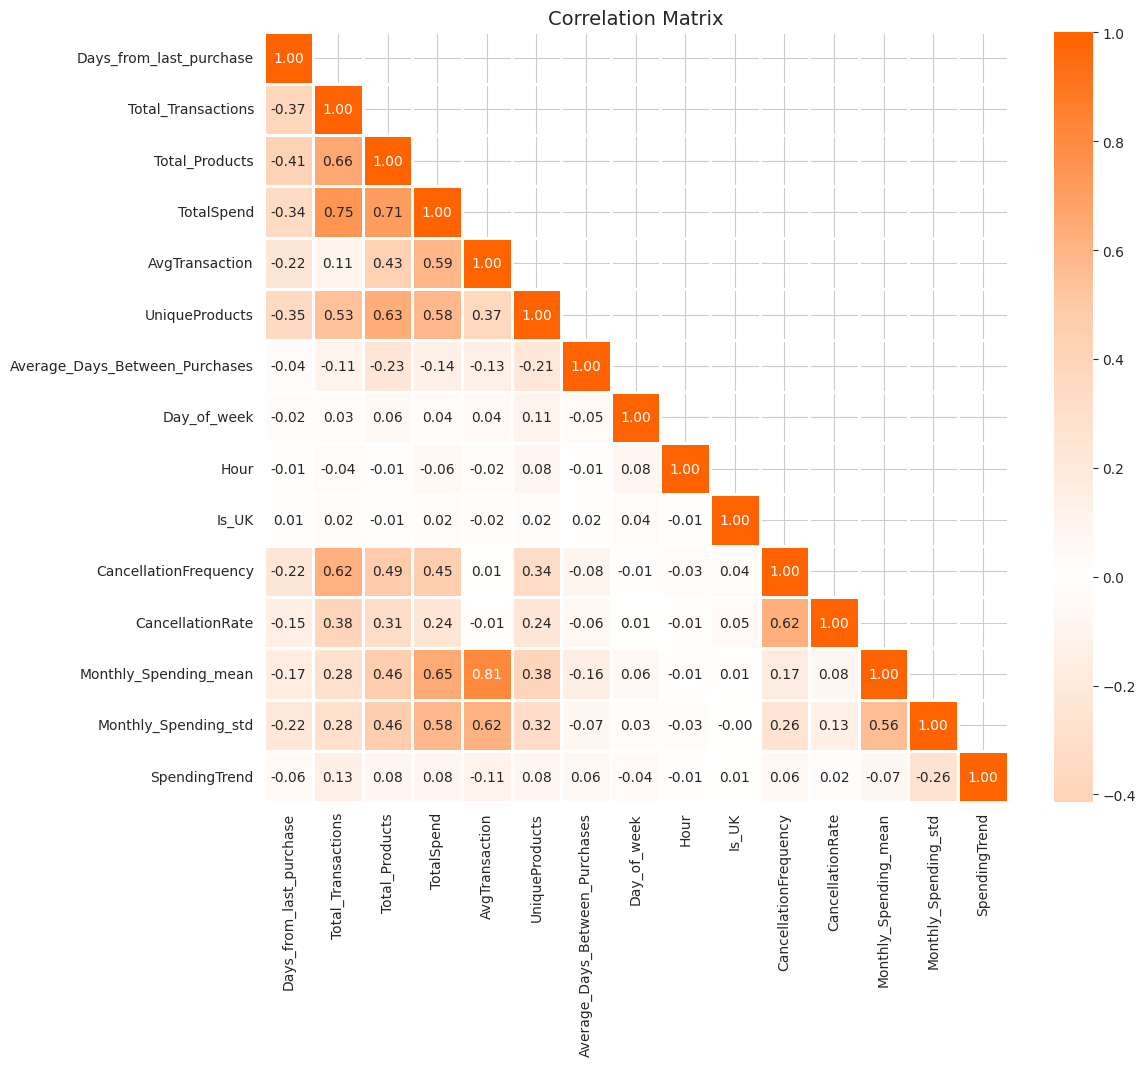

In [79]:
#Reset background style
sns.set_style('whitegrid')

#Calculate the correlation matrix excluding the CustomerID column
corr = customer_data_cleaned_df.drop(columns = 'CustomerID').corr()

#Define a custom color map
# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

Looking at the heatmap, we can see that there are some pairs of variables that have high correlations, for instance:

Monthly_Spending_mean and AvgTransaction

Total_Spend and Total_Products

Total_Transactions and Total_Spend

Monthly_Spending_mean and Total_Spend

Monthly_Spending_std and AvgTransactions

Cancellation_Frequency and Total_Transactions

Cancellation_Rate and Cancellation_Frequency

Total_Transactions and Total_Products

These high correlations indicate that these variables move closely together, implying a degree of multicollinearity.

Given how multicollinearity affects KMeans clustering, it could be helpful to address this multicollinearity first, perhaps using dimensionality reduction methods like PCA to provide a collection of uncorrelated variables. As a result, the KMeans clustering method will produce more stable clusters.

####**Feature Scaling**

We must scale our features before proceeding with the grouping and dimensionality reduction. This phase is crucial, particularly when using dimensionality reduction techniques like PCA and distance-based algorithms like K-means. This is the reason:

For K-means Clustering: To create clusters, K-means mainly depends on the idea of "distance" between data points. Features with higher values can disproportionately affect the clustering result when they are not on the same scale, which could result in inaccurate groupings.
Finding the directions with the most variation in the data is the goal of PCA. Features with higher values may predominate in these components if they are not scaled, which would not appropriately represent the underlying patterns in the data.

I will thus normalize our data, which entails changing the characteristics to have a mean of 0 and a standard deviation of 1, in order to guarantee a balanced influence on the model and to uncover the actual patterns in the data. But not every feature needs to be scaled. The following are the exclusions and the justifications for their exclusion:

CustomerID: This characteristic only serves as a customer's identify; it doesn't provide any useful data for clustering.

Is_UK: This feature is binary and indicates whether or not the customer is a UK citizen. Scaling won't have a big impact because it currently accepts a value of 0 or 1.

Day_Of_Week: This feature indicates which day of the week the consumer performed transactions the most frequently. Scaling would not be required because it is a categorical feature that is represented by integers (1 to 7).

In order to get the dataset ready for PCA and K-means clustering, I will now scale the remaining features.

In [80]:
#Initialize the standard scaler
scaler = StandardScaler()

#List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID','Is_UK', 'Day_of_week']

#List of columns that need to be scaled
columns_to_scale = customer_data_cleaned_df.columns.difference(columns_to_exclude)

#Copy the cleaned dataset
customer_data_scale_df = customer_data_cleaned_df.copy()

customer_data_scale_df[columns_to_scale] = scaler.fit_transform(customer_data_scale_df[columns_to_scale])

customer_data_scale_df.head()

,CustomerID,Days_from_last_purchase,Total_Transactions,Total_Products,TotalSpend,AvgTransaction,UniqueProducts,Average_Days_Between_Purchases,Day_of_week,Hour,Is_UK,CancellationFrequency,CancellationRate,Monthly_Spending_mean,Monthly_Spending_std,SpendingTrend
0,12346.0,3.104437,-0.869159,-1.990405,-0.898520,-1.378526,-1.045329,-0.378338,1,-1.032042,1,-0.590385,-0.374333,-1.210456,-1.019218,0.191424
1,12352.0,-0.323198,0.010135,-0.360016,-0.375679,-0.526459,-0.343153,-0.055290,1,0.724677,1,-0.590385,-0.689893,-0.301313,-0.465037,0.233476
2,12359.0,-0.667148,-0.282963,0.129101,1.656158,4.172579,1.625446,-0.244686,3,-0.153683,1,0.056845,-0.374333,1.751017,3.660924,0.304177
3,12362.0,-0.714589,0.742880,0.618217,1.029200,0.554755,1.449902,-0.263840,3,1.163857,1,0.704075,1.834587,0.465555,0.601733,0.401995
4,12375.0,-0.726449,-0.722610,-1.338250,-0.743404,-0.704419,-0.894863,0.281675,4,0.724677,1,-0.590385,0.067451,-0.850825,-0.565892,-0.241151


####**Dimensionality Reduction**

Why Is Dimensionality Reduction Needed?

**Multicollinearity Found:** We discovered that our dataset had multicollinear characteristics in the earlier stages. We can mitigate the multicollinearity problem and eliminate redundant information by reducing dimensionality.

**Better Using K-means to group:** Having a lot of features might occasionally dilute the significant underlying patterns in the data because K-means is a distance-based method. We can assist K-means in identifying more compact and well-separated clusters by lowering the dimensionality.

**Noise Reduction:** We may be able to eliminate noise in the data by concentrating just on the most significant features, which could result in more precise and reliable clusters.

**Improved Visualization:** The ability to see client groups in two or three dimensions might offer obvious insights when it comes to consumer segmentation. This can be made easier by dimensionality reduction techniques, which reduce the data to a small number of easily plottable primary components.

**Enhanced Computational Efficiency:** Our clustering approach may operate more efficiently by reducing the amount of features, which can shorten the computation time throughout the modeling process.
Now let's choose a suitable dimensionality reduction technique for our data.

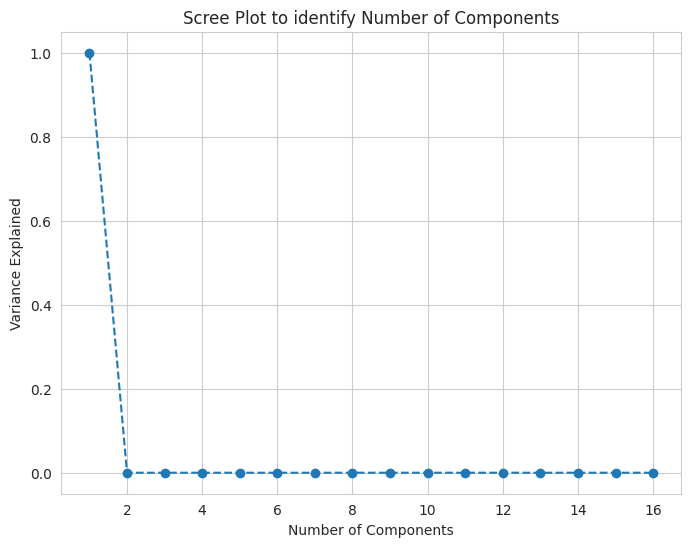

In [81]:
pca = PCA().fit(customer_data_scale_df)

#Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

#Scree Plot
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance)+1),explained_variance, marker = 'o', linestyle = '--')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot to identify Number of Components')
plt.show()

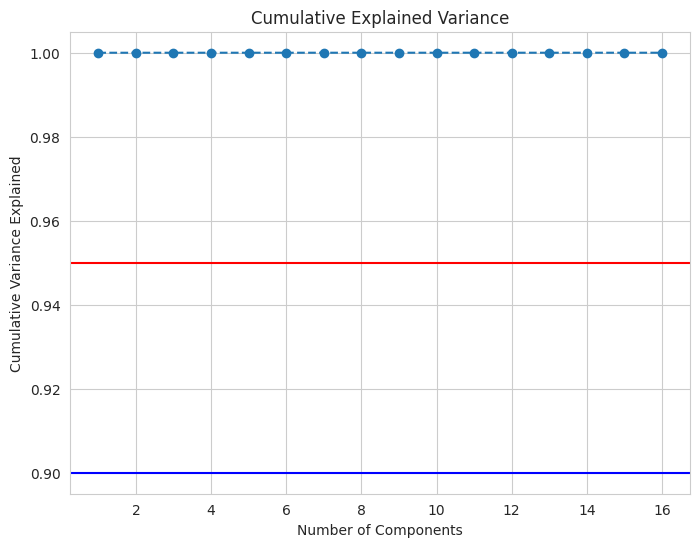

In [82]:
# Cumulative explained variance plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axhline(y=0.90, color='b', linestyle='-')
plt.show()

     CustomerID  Principal Component 1  Principal Component 2
0       12346.0           -2873.786862              -4.064810
1       12352.0           -2867.786879              -1.348575
2       12359.0           -2860.787427               4.072443
3       12362.0           -2857.787059               2.528163
4       12375.0           -2844.786855              -1.942933
...         ...                    ...                    ...
1441    18272.0            3052.212920               0.760232
1442    18274.0            3054.213125              -2.395584
1443    18276.0            3056.212953              -1.101030
1444    18277.0            3057.213268              -2.685513
1445    18282.0            3062.213165              -1.806544

[1446 rows x 3 columns]


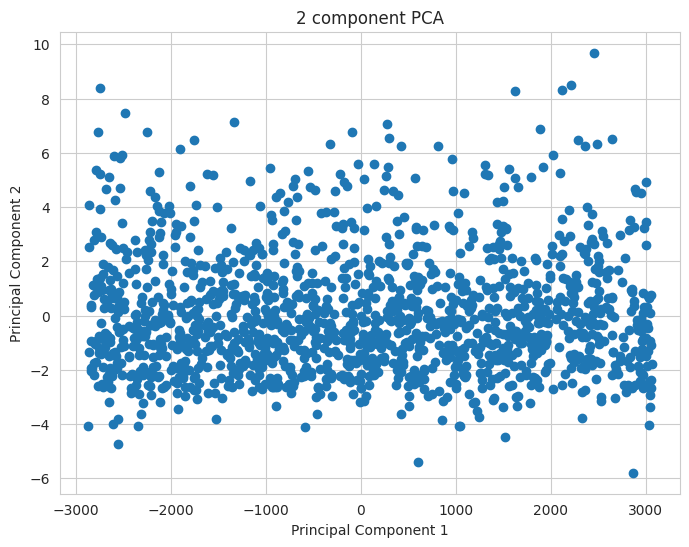

In [83]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(customer_data_scale_df)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate with the CustomerID (or any other identifier)
final_df = pd.concat([customer_data_scale_df[['CustomerID']], principal_df], axis=1)
print(final_df)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.show()

PCA Results Table
You have a table with the following columns:

CustomerID: The unique identifier for each customer.

Principal Component 1: The score of each customer on the first principal component.

Principal Component 2: The score of each customer on the second principal component.

The scatter plot visualizes the data points based on their scores on the first and second principal components.

Observations:
Spread of Data Points:

The data points are spread out in the space defined by the two principal components.
There is a noticeable concentration of points around the center, indicating that many customers have similar characteristics as captured by these two components.
Variance Explained:

From the earlier analysis, we know that the first principal component explains nearly all the variance in the data.
The second component adds a very minimal amount of additional information.
Interpretation of Components:

Principal Component 1: Captures the most significant variation in your dataset. Customers with similar scores on this component have similar overall patterns in their features.
Principal Component 2: Adds minor nuances to the differentiation of customers. Since it explains very little variance, it likely captures very specific and less significant variations.
Clustering:

There doesn't seem to be a distinct clustering or grouping pattern in the plot, which aligns with the fact that the second component doesn't add much new information.
Most data points are relatively close to each other, showing a compact structure, likely dominated by the information captured by the first component.
Outliers:

There are a few points that are farther away from the main cluster of points. These could be potential outliers or customers with unique purchasing behaviors

####**Determine Optimum Number of Clusters**

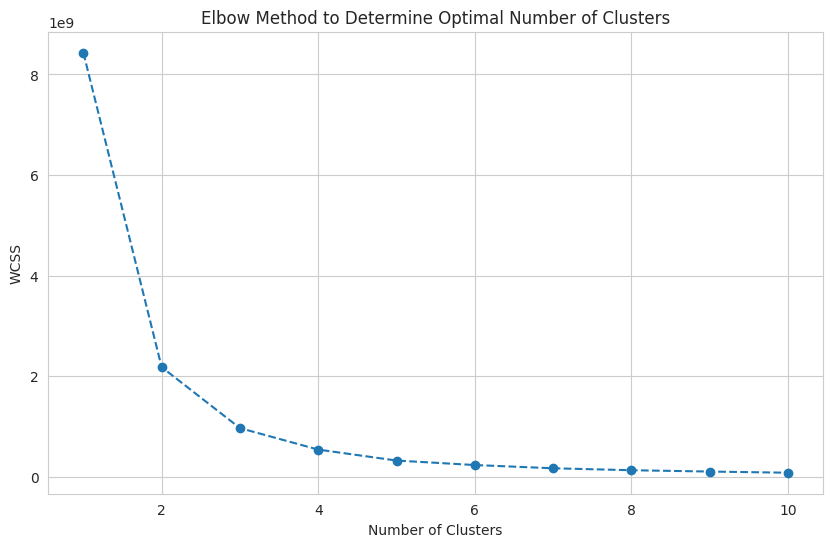

In [84]:
# Step 2: Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(final_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above elbow plot it is observed that the elbow points at 3, hence selected the number of optimal clusters as 3.

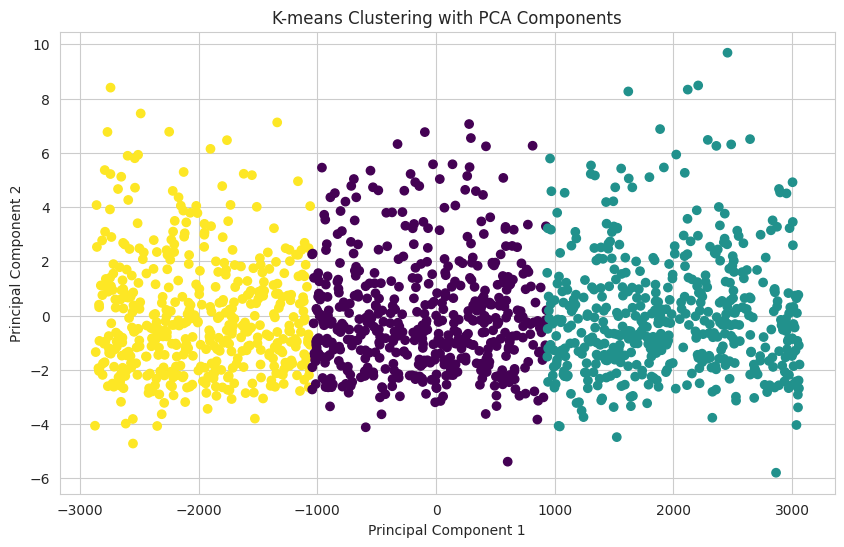

In [85]:
# Step 3: Perform K-means Clustering with the optimal number of clusters
optimal_clusters = 3  # This is determined from the Elbow method graph above
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(final_df)

# Add the cluster labels to the PCA DataFrame
final_df['Cluster'] = kmeans.labels_

# Add the cluster labels to the original DataFrame
customer_data_scale_df['Cluster'] = kmeans.labels_
customer_data_cleaned_df['Cluster'] = kmeans.labels_
#customer_df['Cluster'] =  kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Principal Component 1'], final_df['Principal Component 2'], c=final_df['Cluster'], cmap='viridis')
plt.title('K-means Clustering with PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [86]:
final_df.tail()

,CustomerID,Principal Component 1,Principal Component 2,Cluster
1441,18272.0,3052.212920,0.760232,1
1442,18274.0,3054.213125,-2.395584,1
1443,18276.0,3056.212953,-1.101030,1
1444,18277.0,3057.213268,-2.685513,1
1445,18282.0,3062.213165,-1.806544,1


In [87]:
customer_data_scale_df.head()

,CustomerID,Days_from_last_purchase,Total_Transactions,Total_Products,TotalSpend,AvgTransaction,UniqueProducts,Average_Days_Between_Purchases,Day_of_week,Hour,Is_UK,CancellationFrequency,CancellationRate,Monthly_Spending_mean,Monthly_Spending_std,SpendingTrend,Cluster
0,12346.0,3.104437,-0.869159,-1.990405,-0.898520,-1.378526,-1.045329,-0.378338,1,-1.032042,1,-0.590385,-0.374333,-1.210456,-1.019218,0.191424,2
1,12352.0,-0.323198,0.010135,-0.360016,-0.375679,-0.526459,-0.343153,-0.055290,1,0.724677,1,-0.590385,-0.689893,-0.301313,-0.465037,0.233476,2
2,12359.0,-0.667148,-0.282963,0.129101,1.656158,4.172579,1.625446,-0.244686,3,-0.153683,1,0.056845,-0.374333,1.751017,3.660924,0.304177,2
3,12362.0,-0.714589,0.742880,0.618217,1.029200,0.554755,1.449902,-0.263840,3,1.163857,1,0.704075,1.834587,0.465555,0.601733,0.401995,2
4,12375.0,-0.726449,-0.722610,-1.338250,-0.743404,-0.704419,-0.894863,0.281675,4,0.724677,1,-0.590385,0.067451,-0.850825,-0.565892,-0.241151,2


In [88]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

<ipython-input-89-786b7d476df8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)


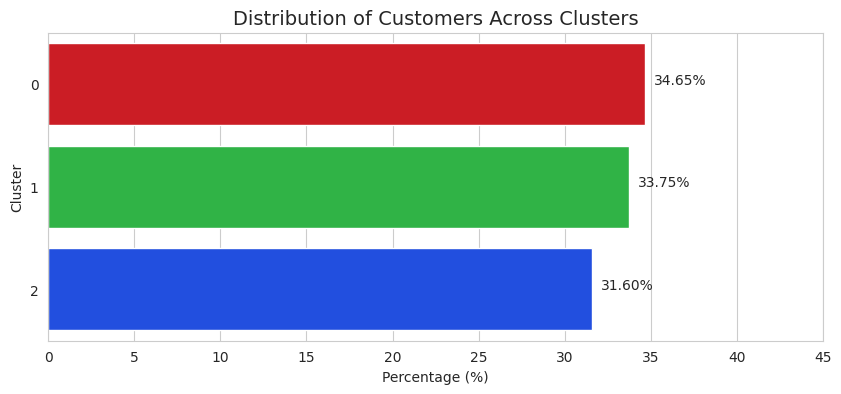

In [89]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (final_df['Cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

####**Histogram Approach**

we can plot histograms for each feature segmented by the cluster labels. These histograms will allow us to visually inspect the distribution of feature values within each cluster, thereby confirming or refining the profiles we have created based on the radar charts.

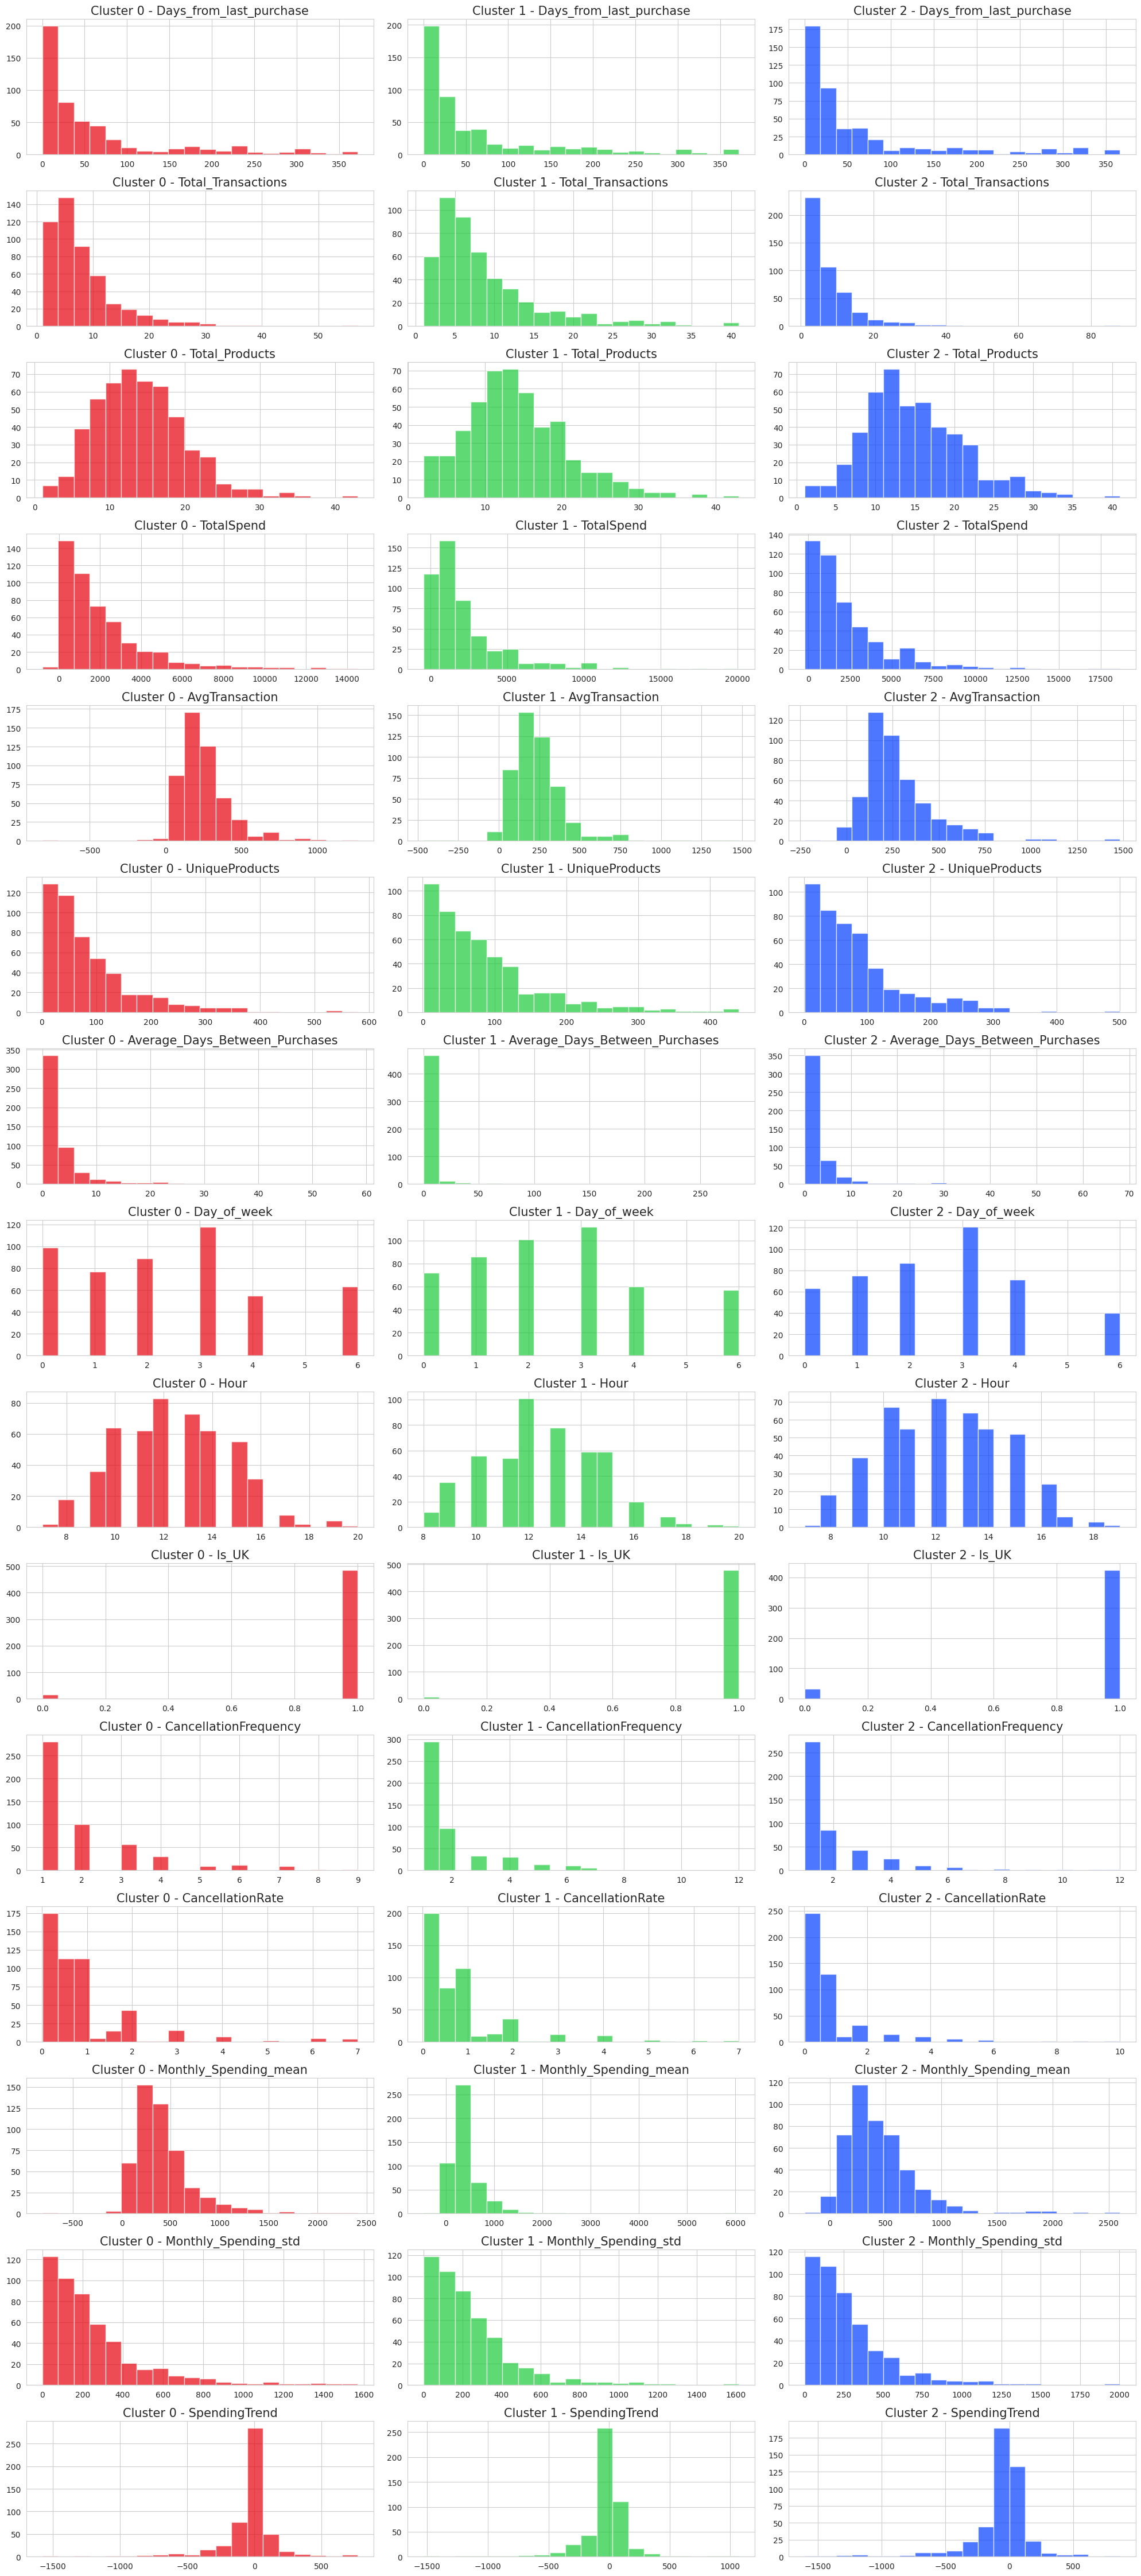

In [90]:
# Plot histograms for each feature segmented by the clusters
features = customer_data_cleaned_df.columns[1:-1]
clusters = customer_data_cleaned_df['Cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned_df[customer_data_cleaned_df['Cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

Looking at the histogram above, let's figure out the shopping patterns of the customers in each clusters.

**CancellationRate:**

Cluster 0: The majority of customers have very low cancellation rates, with most around 0-1. This indicates stable purchasing behavior with few cancellations.

Cluster 1: The cancellation rate is slightly more spread out, but still mostly concentrated at 0-1. However, there are more customers who cancel more often compared to Cluster 0.

Cluster 2: This cluster shows more customers with higher cancellation rates. These customers might be more indecisive or impulsive in their shopping behavior, leading to more frequent cancellations.

**Monthly_Spending_mean:**

Cluster 0: Customers in this group generally spend less, with most spending below 500 per month.

Cluster 1: Spending is higher here, with a mean clustered between 500 to 1000. These customers are more significant spenders, likely representing higher-value customers.

Cluster 2: Similar to Cluster 1 but shows a higher average monthly spending than Cluster 0. These customers might shop less frequently but spend more per purchase.

**Monthly_Spending_std:**

Cluster 0: The spending variance is lower, meaning their spending is more predictable and stable over time.

Cluster 1 & 2: Higher variance indicates more fluctuating spending patterns. These customers could be more unpredictable in how much they spend month to month, possibly shopping more in response to promotions or events.

**SpendingTrend:**

Cluster 0: This shows a very stable trend around zero, indicating no significant changes in spending habits.

Cluster 1 & 2: These clusters have a broader spread around zero, meaning their spending may be increasing or decreasing more sharply compared to Cluster 0.

**UniqueProducts:**

Cluster 0: Customers buy fewer unique products, mostly less than 200, which shows they may have more specific, targeted purchasing habits.

Cluster 1 & 2: Both show customers buying a broader range of unique products, indicating more diverse or exploratory shopping habits.

**Average_Days_Between_Purchases:**

Cluster 0: Customers here take longer between purchases, with a majority falling in the range of 0-10 days, but some go as long as 50-60 days.

Cluster 1: Most customers purchase more frequently, with the majority falling within a shorter range.

Cluster 2: Similar to Cluster 1 but with fewer days between purchases, showing that these customers are more frequent shoppers.

**Day_of_week:**

Cluster 0: These customers tend to shop across the week, with a slight peak around mid-week (Day 3, Wednesday). This could indicate that these customers prefer to shop during the middle of the workweek.

Cluster 1: There’s a wider distribution, with peaks on Day 1 (Monday) and Day 3 (Wednesday), suggesting more varied shopping habits.

Cluster 2: This cluster also has a spread-out pattern, with a noticeable dip on weekends, indicating a preference for weekday shopping.

**Hour:**

Cluster 0: Most of the shopping activity occurs between 10 am to 2 pm, suggesting these are casual shoppers who shop during the middle of the day.
Cluster 1 & 2: These clusters also show peaks around midday but have more variation, with some customers shopping earlier or later in the day.

####<u>**Conclusion</u>:**

**Cluster 0:** Casual, stable shoppers who shop infrequently, spend less, and have predictable, low-variance shopping behaviors.

**Cluster 1:** These are occasional big spenders, with more variance in their spending and a tendency to cancel transactions. They spend more per transaction and shop at varying times.

**Cluster 2:** Early bird shoppers who shop more frequently but show similar spending trends to Cluster 1. They are likely more impulsive or spontaneous in their purchases but tend to spend more overall.

###<u>**Recommendation System**:</u>

In this section, I am developing a product recommendation system designed to enhance customer experience and potentially boost sales by offering relevant product suggestions.

**Product Popularity within Clusters:** I analyzed which products are popular within each customer segment (cluster). This helped me identify top-performing products for each cluster based on purchase frequency. These popular products reflect the collective interest of the group, making them a strong basis for recommendations.

**Recommend Unpurchased Products:** Using this information, built a system that recommends products that a customer hasn’t purchased but are popular among their peers in the same cluster. By suggesting new, relevant products, the system can help drive repeat purchases and increase overall sales by promoting items that the customer might not have considered otherwise.

Let's start by understanding the product popularity in each clusters

In [91]:
customer_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionStatus,InvoiceDay,TotalSpend,Day_of_week,Hour,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Complete,2010-12-01,15.30,2,8,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Complete,2010-12-01,20.34,2,8,2010,12


In [92]:
customer_data_cleaned_df.head()

,CustomerID,Days_from_last_purchase,Total_Transactions,Total_Products,TotalSpend,AvgTransaction,UniqueProducts,Average_Days_Between_Purchases,Day_of_week,Hour,Is_UK,CancellationFrequency,CancellationRate,Monthly_Spending_mean,Monthly_Spending_std,SpendingTrend,Cluster
0,12346.0,325,2,2,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,2
1,12352.0,36,8,12,1265.41,158.17625,57,3.13253,1,14,1,1,0.142857,316.3525,134.700629,9.351,2
2,12359.0,7,6,15,6182.98,1030.496667,214,1.296,3,12,1,2,0.5,1030.496667,1137.566659,25.072571,2
3,12362.0,3,13,18,4665.58,358.890769,200,1.110266,3,15,1,3,3.0,583.1975,393.992285,46.824048,2
4,12375.0,2,3,6,375.42,125.14,13,6.4,4,14,1,1,1.0,125.14,110.186654,-96.19,2


In [93]:
#Extract the CustomerIDs of the outliers and remove their transactions from the main dataframe
outlier_customers = Outlier_data['CustomerID'].astype('float').unique()
customer_without_outlier_df = customer_df[~customer_df['CustomerID'].isin(outlier_customers)]

In [94]:
#Ensuring consistent datatype for CustomerID across both dataframes before merging
customer_data_cleaned_df['CustomerID'] = customer_data_cleaned_df['CustomerID'].astype('float')

In [95]:
#Merge the transaction data with the customer data to get the cluster information for each transaction
combined_data = customer_without_outlier_df.merge(customer_data_cleaned_df[['CustomerID','Cluster']], on = 'CustomerID', how = 'inner')

In [96]:
#Group by cluster, Products and then count the number of purchases
product_popularity = combined_data.groupby(['Cluster','StockCode'])['InvoiceNo'].count().reset_index()
# Rank products by popularity within each cluster
product_popularity['Rank'] = product_popularity.groupby('Cluster')['InvoiceNo'].rank(method='first', ascending=False)

In [97]:
# List of products a customer has purchased
customer_products = combined_data.groupby('CustomerID')['StockCode'].apply(list)

In [98]:
#List of top products in the cluster
cluster_top_products = product_popularity.groupby('Cluster')['StockCode'].apply(list)

In [122]:
#Function to recommend top 3 not purchased products to the customer
def recommend_products(customer_id):
  #Get customer data based on customer ID
  customer_info = combined_data[combined_data['CustomerID'] == customer_id]

  if customer_info.empty:
    return None, None

  #Extract Cluster and purchased products
  customer_cluster = customer_info['Cluster'].values[0]
  product_purchased = customer_info['StockCode'].values[0]

  #Get popular products from the respective customer's cluster
  cluster_popular_products = cluster_top_products[customer_cluster]

  #recommend products not purchsed by customers
  recommendations = [product for product in cluster_popular_products if product not in product_purchased][:3]

  return customer_cluster, recommendations

In [123]:
#Input CustomerID from user
customer_id_input = int(input("Enter Customer ID:-"))

Enter Customer ID:-17850


In [124]:
customer_cluster, recommendations = recommend_products(customer_id_input)

In [125]:
if customer_cluster is None:
  print("No Data found")
else:
  print(f"Entered Customer belongs to Cluster:{customer_cluster}")
  print(f"Recommended products for Customer {customer_id_input}: {recommendations}")

No Data found


In [120]:
combined_data[combined_data['CustomerID']==17850]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionStatus,InvoiceDay,TotalSpend,Day_of_week,Hour,Year,Month,Cluster


In [127]:
#Input CustomerID from user
customer_id_input = int(input("Enter Customer ID:-"))

Enter Customer ID:-13047


In [128]:
customer_cluster, recommendations = recommend_products(customer_id_input)

In [129]:
if customer_cluster is None:
  print("No Data found")
else:
  print(f"Entered Customer belongs to Cluster:{customer_cluster}")
  print(f"Recommended products for Customer {customer_id_input}: {recommendations}")

Entered Customer belongs to Cluster:2
Recommended products for Customer 13047: ['10002', '10080', '10120']


In [126]:
combined_data[combined_data['CustomerID']==13047].head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionStatus,InvoiceDay,TotalSpend,Day_of_week,Hour,Year,Month,Cluster
0,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,Complete,2010-12-01,54.08,2,8,2010,12,2
1,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,Complete,2010-12-01,12.60,2,8,2010,12,2


####**<u>Outcome for Business:</u>**

**Enhanced Customer Experience:** Customers receive targeted suggestions aligned with their purchasing interests, adding a personal touch to their shopping experience.

**Increased Sales Opportunities:** By recommending items that are likely to appeal to each customer, there is a higher chance of converting these recommendations into actual purchases.

**Data-Driven Decision-Making:** The insights from clustering and popularity analysis allow the business to identify and promote high-demand products within each segment, which can inform stock, promotions, and marketing strategies.



Overall, this recommendation system is a data-driven approach to improve customer satisfaction and business revenue by suggesting products that are relevant and likely to interest each individual based on their cluster's behavior.

#####**<u>References</u>**
1. Referred Kaggle existing analysis
2. ChatGPT for logic wherever stuck